# Статистический анализ данных сервиса аренды самокатов

**Описание проекта**

Основная цель проекта: проанализировать данные сервиса аренды самокатов и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:

 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra:

 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

**Описание исходных данных**

В исходных данных есть информация о пользователях, их поездках и подписках, сгруппированных в файлы.

Пользователи — `###.csv`:

- `user_id` - уникальный идентификатор пользователя;
- `name` - имя пользователя;
- `age` - возраст;
- `city` - город;
- `subscription_type` - тип подписки (free, ultra).

Поездки — `###.csv`:

- `user_id` - уникальный идентификатор пользователя;
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах);
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
- `date` - дата совершения поездки.

Подписки — `###.csv`:

- `subscription_type` - тип подписки;
- `minute_price` - стоимость одной минуты поездки по данной подписке;
- `start_ride_price` - стоимость начала поездки;
- `subscription_fee` - стоимость ежемесячного платёж.



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Исследовательский анализ данных</a></span></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Объединение данных</a></span></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Подсчёт выручки</a></span></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
import seaborn as sns

In [2]:
# Отображение всех колонок таблиц
pd.set_option('display.max_columns', None)
# избавление от экспоненциального формата вывода чисел
#pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Чтение данных
try:
    users = pd.read_csv('###.csv') 
    rides = pd.read_csv('###.csv') 
    subscriptions = pd.read_csv('###.csv') 
except:
    users = pd.read_csv('###.csv') 
    rides = pd.read_csv('###.csv') 
    subscriptions = pd.read_csv('###.csv') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB



,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


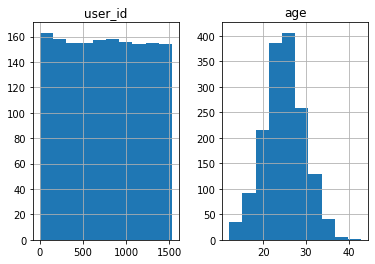

In [4]:
# Изучение датафрейма `users`
users.info()
print()
display(users.describe())
users.hist()
users.head()

Датафрейм `users` имеет 5 столбцов и 1565 строк без пропусков и выбросов. Типы данных столбцов не нуждаются в преобразовании. В столбце `user_id` вероятно есть дубликаты.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB



,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


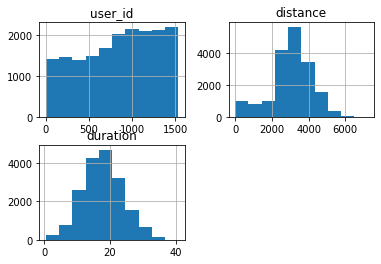

In [5]:
# Изучение датафрейма `rides` 
rides.info()
print()
display(rides.describe())
rides.hist()
rides.head()

Датафрейм `rides` имеет 4 столбца и 18068 строк без пропусков и выбросов. Столбец `date` имеет неверный тип 'object', приведем к типу Date без времени.

In [6]:
# Изучение датафрейма `subscriptions`
subscriptions.info()
print()
subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes



,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Датафрейм `subscriptions` имеет 4 столбца и 2 строки без пропусков. 

**Выводы:**
Все датафреймы загрузились без ошибок. В данных отсутствуют пропуски. В датафрейме `rides` поле `date` имеет тип `object`.

#### Шаг 2. Предобработка данных

Столбец `date` датафрейма `rides` имеет значение даты, приведем его к типу Date без времени.

In [7]:
# Переведем значения в столбце `date` в формат даты
rides['date']=pd.to_datetime(rides['date'], format = '%Y-%m-%d')

Создадим новый столбец `month` с номером месяца на основе столбца `date`.

In [8]:
rides['month'] = rides.date.dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим наличие дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [9]:
print('Количество дубликатов в датафрейме `users`:', users.duplicated().sum())
print('Количество дубликатов в датафрейме `rides`:', rides.duplicated().sum())
print('Количество дубликатов в датафрейме `subscriptions`:', subscriptions.duplicated().sum())

Количество дубликатов в датафрейме `users`: 31
Количество дубликатов в датафрейме `rides`: 0
Количество дубликатов в датафрейме `subscriptions`: 0


In [10]:
users.drop_duplicates(inplace=True)
print('Количество дубликатов в датафрейме `users`:', users.duplicated().sum())

Количество дубликатов в датафрейме `users`: 0


**Выводы:**
Пропущенных данных в таблицах нет. Дубликаты имеются среди пользователей, удалили строки-дубликаты. Добавили столбец `month` с номер месяца.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

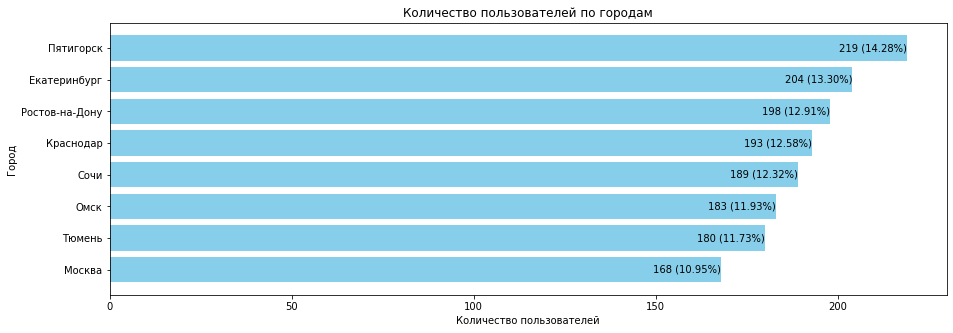

In [11]:
# Количество пользователей в каждом городе
city_counts = users['city'].value_counts().reset_index()
city_counts.columns = ['city', 'user_count']

# Процент пользователей
total_users = city_counts['user_count'].sum()
city_counts['user_percentage'] = (city_counts['user_count'] / total_users) * 100
city_counts = city_counts.sort_values(by='user_count', ascending=True)

# Создание столбикового графика
plt.figure(figsize=(15, 5))
bars = plt.barh(city_counts['city'], city_counts['user_count'], color='skyblue')
for bar, user_count, user_percentage in zip(bars, city_counts['user_count'], city_counts['user_percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{user_count} ({user_percentage:.2f}%)', 
             va='center', ha='right')
plt.title('Количество пользователей по городам')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()

Датафреймы содержат данные о пользователях из 8-ми городов. Больше всего пользователей из Пятигорска — 219 (14.28 %), меньше всего из Москвы — 168 (10.95%).

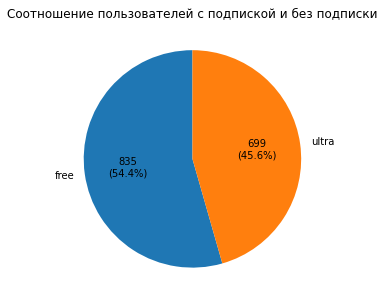

In [12]:
subscription_counts = users['subscription_type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(subscription_counts,
            labels=subscription_counts.index,
            autopct=lambda pct: f"{int(np.round(pct / 100. * sum(subscription_counts)))}\n({pct:.1f}%)",
            startangle=90)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

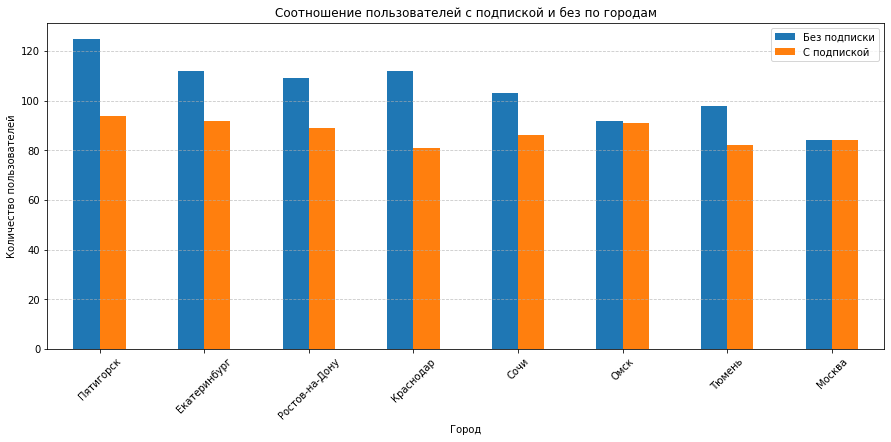

In [13]:
grouped_data = users.groupby(['city', 'subscription_type']).size().unstack(fill_value=0)
sorted_data = grouped_data.sum(axis=1).sort_values(ascending=False)
grouped_data = grouped_data.loc[sorted_data.index]

grouped_data.plot(kind='bar', stacked=False, figsize=(15, 6))
plt.title('Соотношение пользователей с подпиской и без по городам')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.legend(labels=['Без подписки', 'С подпиской'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Пользователей, использующих бесплатную подписку больше - 835 человек (54.4%) от общего числа пользователей. На платной подписке сидит 699 пользователей (45.6%). В зависимости от городов данное соотнощшение также соблюдается.

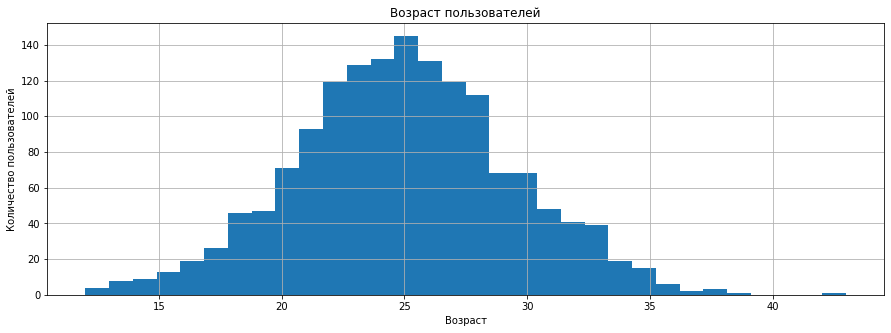

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [14]:
users['age'].plot(kind = 'hist', grid=True, figsize = (15,5), bins = 32)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()
users['age'].describe()

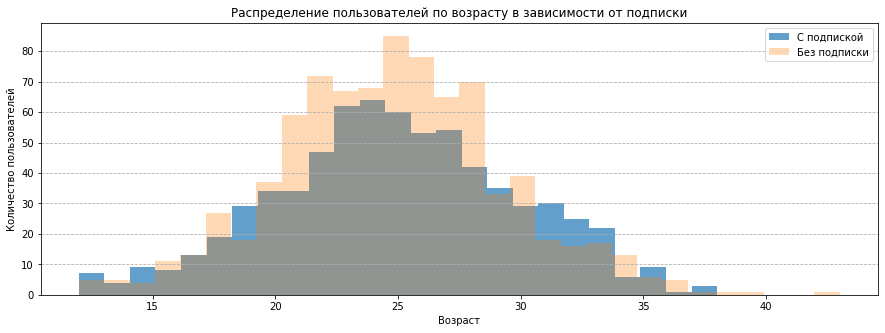

In [15]:
plt.figure(figsize=(15, 5))
# Гистограмма для пользователей с подпиской
plt.hist(users[users['subscription_type'] == "ultra"]['age'], bins=25, alpha=0.7, label='С подпиской')
# Гистограмма для пользователей без подписки
plt.hist(users[users['subscription_type'] == "free"]['age'], bins=30, alpha=0.3, label='Без подписки')

plt.title('Распределение пользователей по возрасту в зависимости от подписки')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.

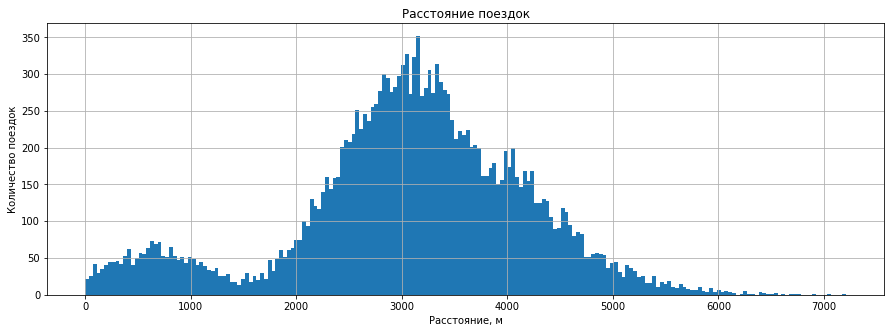

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [16]:
rides['distance'].plot(kind = 'hist', grid=True, figsize = (15,5), bins = 200)
plt.title('Расстояние поездок')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()
rides['distance'].describe()

За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.

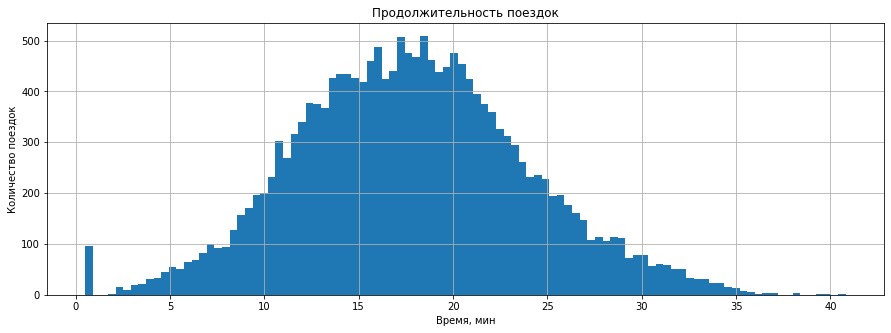

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [17]:
rides['duration'].plot(kind = 'hist', grid=True, figsize = (15,5), bins = 100)
plt.title('Продолжительность поездок')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')
plt.show()
rides['duration'].describe()

Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Имеем аномалию на 1 минуте. Рассмотрим характер данной аномалии на диаграмме рассеяния. 

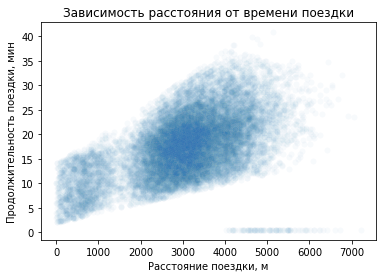

In [18]:
sns.scatterplot(data=rides, x='distance', y='duration', alpha=0.03)
plt.xlabel('Расстояние поездки, м')
plt.ylabel('Продолжительность поездки, мин')
plt.title('Зависимость расстояния от времени поездки')
plt.show()

Рассмотрим аномалию в приближении.

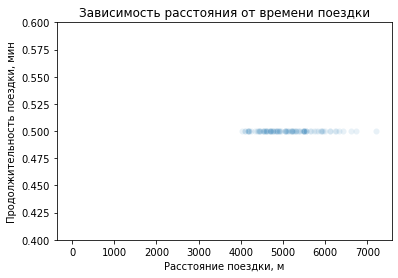

In [19]:
sns.scatterplot(data=rides, x='distance', y='duration', alpha=0.1)
plt.ylim(0.4, 0.6)
plt.xlabel('Расстояние поездки, м')
plt.ylabel('Продолжительность поездки, мин')
plt.title('Зависимость расстояния от времени поездки')
plt.show()

In [20]:
len(rides.query('duration == 0.5'))

95

Имеем 95 поездкок с расстоянием от 4000 м с продолжительностью поездки, равной 0.5 минут. Возможно таким образом была реализована какая-нибудь акция с бесплатными минутами, необходимо уточнить характер данной аномалии. 

**Выводы:**
- Датафреймы содержат данные о пользователях из 8-ми городов. Больше всего пользователей из Пятигорска — 219 (14.28 %), меньше всего из Москвы — 168 (10.95%).
- Пользователей, использующих бесплатную подписку больше - 835 человек (54.4%) от общего числа пользователей. На платной подписке сидит 699 пользователей (45.6%). В зависимости от городов данное соотнощшение также соблюдается.
- Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
- За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.
- Продолжительность поездок нормально распределена от 0 до 35 минут, с выбросами до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается аномалия размером 95 поездок с продолжительностью в 0.5 минуты, необходимо уточнить характер данной аномалии.

#### Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [21]:
# Общая таблица с данными
go_fast = users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type')

In [22]:
go_fast.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Создадим ещё два датафрейма из датафрейма `go_fast`:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [23]:
sub_ultra = go_fast[go_fast['subscription_type'] == 'ultra']
sub_free = go_fast[go_fast['subscription_type'] == 'free']

Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

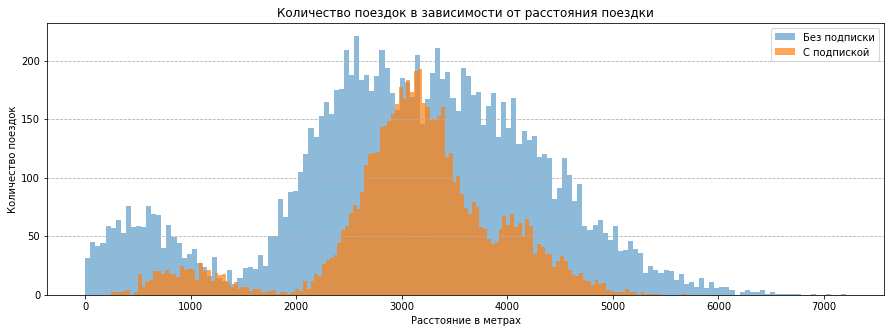

In [24]:
plt.figure(figsize=(15, 5))
plt.hist(sub_free['distance'], bins=150, alpha=0.5, label='Без подписки')
plt.hist(sub_ultra['distance'], bins=150, alpha=0.7, label='С подпиской')

plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

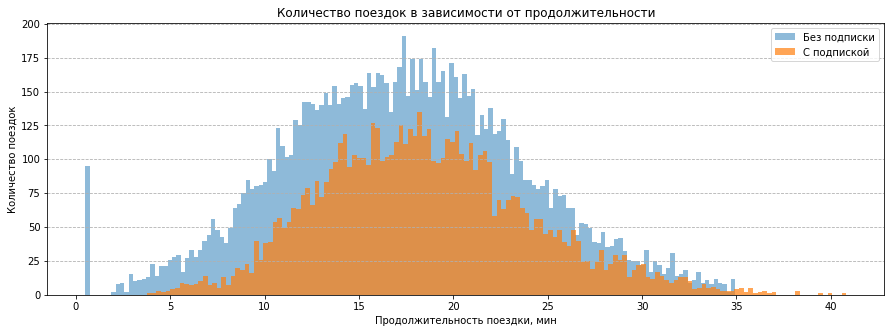

In [25]:
plt.figure(figsize=(15, 5))
plt.hist(sub_free['duration'], bins=150, alpha=0.5, label='Без подписки')
plt.hist(sub_ultra['duration'], bins=150, alpha=0.7, label='С подпиской')

plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

**Выводы:**
- Объединили данные о пользователях, поездках и тарифах в один датафрейм `go_fast`.
- Выделили два датафрейма на основе `go_fast`:
 - `sub_free` - Информация о пользователях с бесплатным тарифом
 - `sub_ultra` - Информация о пользователях с платным тарифом
- Визуализировали информацию о расстоянии и времени для каждого из тарифов:
 - Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км. Все аномалии с продолжительностью поездки, равной 0.5 минут, отмечены у пользователей с бесплатным тарифом. Причина возникновения данной аномалии не ясна.  
 - В платном тарифе время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [26]:
go_fast_pivot = go_fast.pivot_table(index=['month', 'user_id'],
                                    values = ['distance', 'duration', 'name', 'subscription_type'],
                                    aggfunc = {'distance': sum, 
                                               'duration' : sum,
                                               'name' : len, 
                                               'subscription_type' : min})
go_fast_pivot.rename(columns = {'name' : 'rides_count'}, inplace = True)
go_fast_pivot['duration'] = np.ceil(go_fast_pivot['duration'])
go_fast_pivot.sort_values(by='month').head(20)

distance  duration  rides_count subscription_type
month user_id                                                       
1     1         7027.511294      42.0            2             ultra
      1061     12637.249630      42.0            3              free
      1063      3276.362299      10.0            1              free
      1064      5297.324649      15.0            1              free
      1065     14547.099333      97.0            4              free
      1066      2809.064949      19.0            1              free
      1067      3864.900780      22.0            1              free
      1069      7007.076943      51.0            3              free
      1071      3635.094136      15.0            1              free
      1072      2498.615999      11.0            1              free
      1073      2945.802455      16.0            1              free
      1074      2814.793386      22.0            1              free
      1075      5746.745124      28.0            3              free
      1077       114.036199      13.0            1              free
      1078      3748.219563      19.0            1              free
      1082      7250.124895      30.0            2              free
      1083      5848.881463      30.0            2              free
      1084      4615.097141      25.0            1              free
      1085     11410.546346      62.0            3              free
      1086      4044.280322      18.0            1              free

Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа.

In [27]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['rides_count']
    else:
        return 'Not such sub'

In [28]:
go_fast_pivot['revenue_per_month'] = go_fast_pivot.apply(revenue, axis=1)
go_fast_pivot.head(20)

distance  duration  rides_count subscription_type  \
month user_id                                                         
1     1        7027.511294      42.0            2             ultra   
      3        3061.777147      13.0            1             ultra   
      5        3914.646990      13.0            1             ultra   
      7        6478.080979      28.0            2             ultra   
      12       3577.151148      33.0            1             ultra   
      13       6687.987446      42.0            2             ultra   
      14       7699.643820      34.0            2             ultra   
      15       4187.621459      39.0            1             ultra   
      20       3516.719208      29.0            1             ultra   
      22       3058.692225      13.0            1             ultra   
      25       3440.353053      17.0            1             ultra   
      26       6545.964099      27.0            2             ultra   
      30       7774.720501      25.0            2             ultra   
      32       3734.993902      25.0            1             ultra   
      35       9707.810053      57.0            3             ultra   
      42       4329.769187      23.0            1             ultra   
      43       6322.206034      47.0            2             ultra   
      44       2944.410629      19.0            2             ultra   
      45       3702.424319      27.0            2             ultra   
      46       3242.092435      20.0            1             ultra   

               revenue_per_month  
month user_id                     
1     1                    451.0  
      3                    277.0  
      5                    277.0  
      7                    367.0  
      12                   397.0  
      13                   451.0  
      14                   403.0  
      15                   433.0  
      20                   373.0  
      22                   277.0  
      25                   301.0  
      26                   361.0  
      30                   349.0  
      32                   349.0  
      35                   541.0  
      42                   337.0  
      43                   481.0  
      44                   313.0  
      45                   361.0  
      46                   319.0

**Выводы:**
- Создали новый датафрейм с агрегированными данными `go_fast_pivot` на основе датафрейма с объединенными данными.
- Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Выдвинем гипотезы:

- Нулевая гипотеза: средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.
- Альтернативная гипотеза: поездки пользователей с подпиской более продолжительные.

In [29]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sub_ultra['duration'], sub_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Выдвинем гипотезы:
- Нулевая гипотеза: Среднее расстояние поездок с использованием подписки  `ultra` равно оптимальному расстоянию в 3130 метров.
- Альтернативная гипотеза: Среднее расстояние поездок с использованием подписки `ultra` более 3130 метров.

In [30]:
optimal_value = 3130
results = st.ttest_1samp(sub_ultra['distance'], optimal_value, alternative='greater')
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.9195368847849785
Не отвергаем нулевую гипотезу


Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Выдвинем гипотезы:

- Нулевая гипотеза: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.
- Альтернативная гипотеза: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

In [31]:
ultra_per_mnth = go_fast_pivot.loc[go_fast_pivot.subscription_type == 'ultra', 'revenue_per_month'] 
free_per_mnth = go_fast_pivot.loc[go_fast_pivot.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth, free_per_mnth, alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобится бы для проверки этой гипотезы?

Т.к. в файле содежатся данные о количестве обращений до и после обновления для каждого пользователя, будем считать обе выборки одинакового размера. В данном случае проверяется гипотеза о равенстве среднего генеральной совокупности до и после изменения и используется двухвыборочный t-тест для зависимых выборок c правосторонней проверкой гипотезы.
Тест будет иметь следующий вид:
- Нулевая гипотеза: Количество обращений в техподдержку до `before` и после `after` обновления сервера равны.
- Альтернативная гипотеза: Количество обращений в техподдержку до обновления сервера больше количества обращений в техподдержку после обновления сервера.

`results = scipy.stats.ttest_rel(before, after, alternative = 'greater')`

**Выводы**

Прoверили ряд гипотез и получили следующие результаты: 
- Продолжительность поездки пользователей с подпиской в среднем больше продолжительности поездок пользователей без подписки.
- Среднее расстояние поездок пользователей с подпиской равно оптимальному с точки зрения износа самоката расстоянию в 3130 метров.
- Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

#### Общий вывод

Основная цель проекта достигнута. Проанализированы данные сервиса аренды самокатов и проверены некоторые гипотезы, которые могут помочь бизнесу вырасти.

В ходе проекта были проделаны следующие шаги:
1. Загрузка данных.
2. Предобработка данных:
- Корректировка типов данных столбцов.
- Добавление столбцов.
- Обработка неявных дубликатов.
- Проверка результатов предобработки данных.
3. Исследовательский анализ данных:
- Частота встречаемости городов.
- Соотношение пользователей с подпиской и без нее.
- Возраст пользователей.
- Расстояние одной поездки.
- Продолжительность поездок.
- Сделаны промежуточные выводы исследовательского анализа.
4. Объединение данных:
- Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge().
- Создание двух датафреймов с пользователями, имеющими подписку и без нее, на основе общего датафрейма.
- Визуализация данных из датафреймов, разделенных на пользователей с подпиской и без.
5. Подсчёт выручки:
- Создание датафрейма, агрегированного по пользователям, на основе ‘total_go’
- Добавление столбца в агрегированный датафрейм с помесячной выручкой по каждому пользователю
6. Проверка гипотез:
- Тратят ли пользователи с подпиской больше времени на поездки?
- Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

В ходе исследовательского анализа данных было выявлено:
- Датафреймы содержат данные о пользователях из 8-ми городов. Больше всего пользователей из Пятигорска — 219 (14.28 %), меньше всего из Москвы — 168 (10.95%).
- Пользователей, использующих бесплатную подписку больше - 835 человек (54.4%) от общего числа пользователей. На платной подписке сидит 699 пользователей (45.6%). В зависимости от городов данное соотнощшение также соблюдается.
- Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
- За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.
- Продолжительность поездок нормально распределена от 0 до 35 минут, с выбросами до 48 минут. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается аномалия размером 95 поездок с продолжительностью в 0.5 минуты. О данной аномалии необходимо указать владельцам проката для устранения. Данную аномалию заменили продолжительностями поездок, посчитанными на основе медианы скорости поездок каждого пользователя.

В результате группировки данных выявлено:
- Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км. Все аномалии с продолжительностью поездки, равной 0.5 минут, отмечены у пользователей с бесплатным тарифом. Причина возникновения данной аномалии не ясна.
- В платном тарифе время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
- Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

Прoверили ряд гипотез и получили следующие результаты:

Продолжительность поездки пользователей с подпиской в среднем больше продолжительности поездок пользователей без подписки.
Среднее расстояние поездок пользователей с подпиской равно оптимальному с точки зрения износа самоката расстоянию в 3130 метров.
Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

